<a href="https://colab.research.google.com/github/DimathJayasinghe/ModelX_hackathon/blob/main/git_push_force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Data Preprocessing & Understanding



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/sample_data/Dementia Prediction Dataset.csv')

/tmp/ipython-input-3283546026.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/sample_data/Dementia Prediction Dataset.csv')


In [ ]:
df

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195191,NACC998475,9661,F,2.0,11,6,2008,3,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
195192,NACC999391,9661,I,1.0,3,2,2006,1,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
195193,NACC999391,9661,F,1.0,5,17,2007,2,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
195194,NACC999391,9661,F,2.0,3,27,2008,3,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [ ]:
## selected these non medical features by reading data dictionary
non_medical_variables = [
    "MARISTAT", "NACCLIVS", "INDEPEND", "RESIDENC", "HANDED", "BIRTHMO", "BIRTHYR", "SEX",
    "HISPANIC", "HISPOR", "HISPORX", "RACE", "RACEX",
    "RACESEC", "RACESECX", "RACETER", "RACETERX", 'NACCNIHR',
    "PRIMLANG", "PRIMLANX", "EDUC", "NACCREAS",
    "NACCREFR", "NACCNIHR",

    "INBIRMO", "INBIRYR", "INSEX", "NEWINF",

    "NACCFAM", "NACCMOM", "NACCDAD", "NACCFADM",
    "NACCAM", "NACCAMS"
]
df_new=df[non_medical_variables]

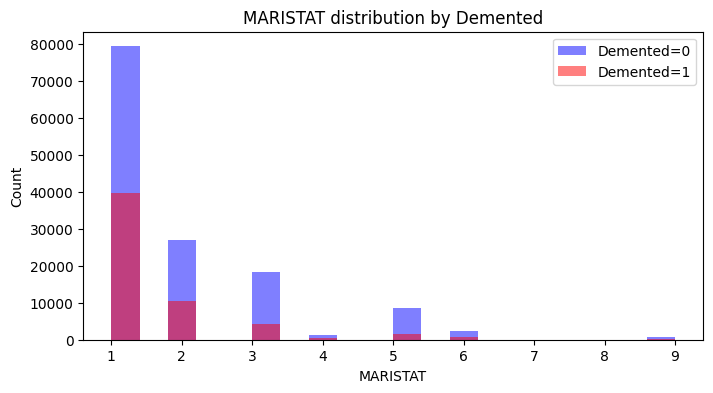

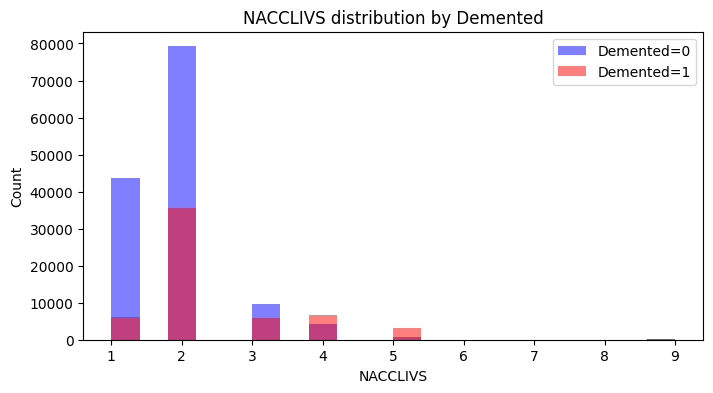

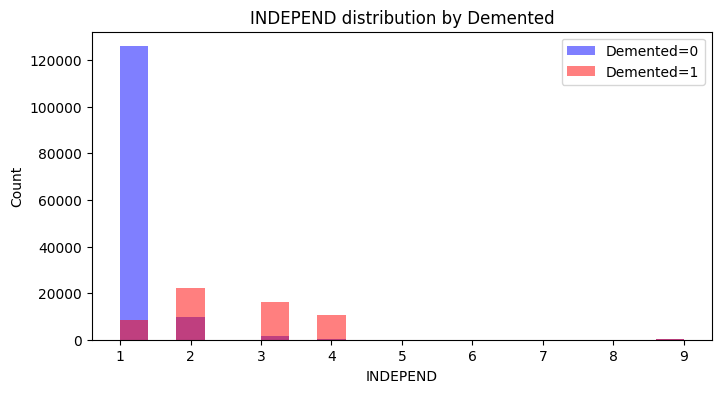

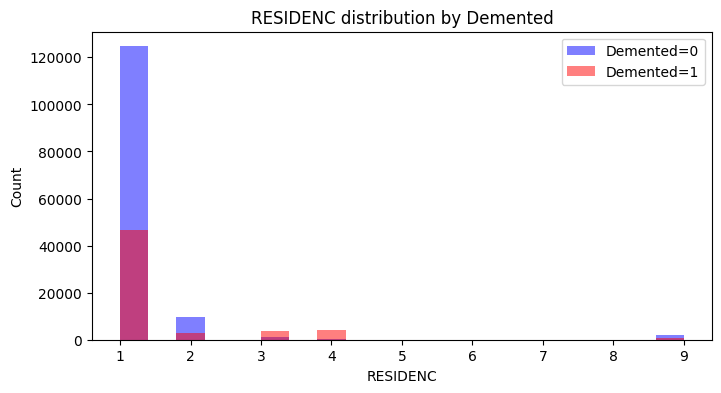

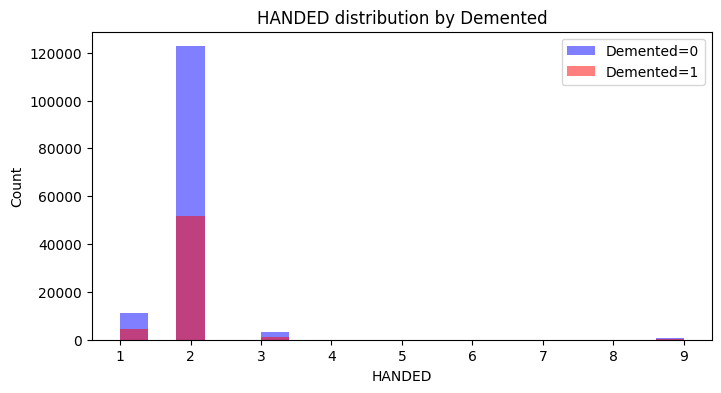

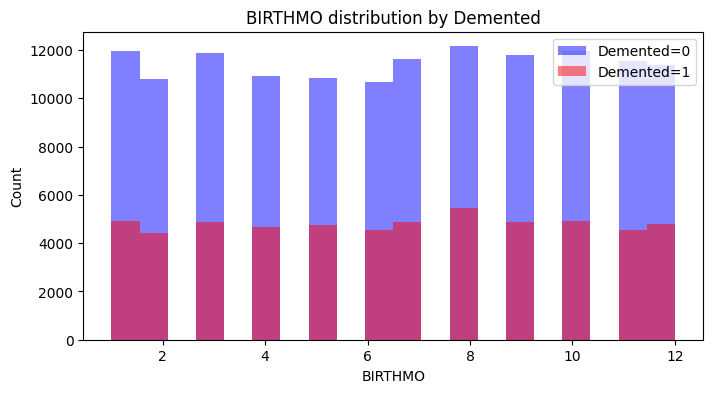

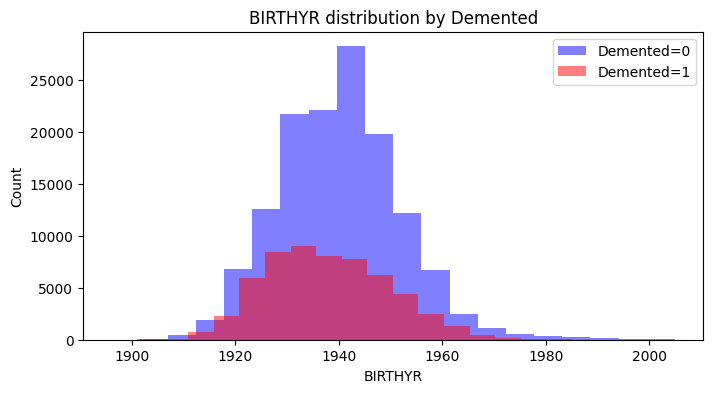

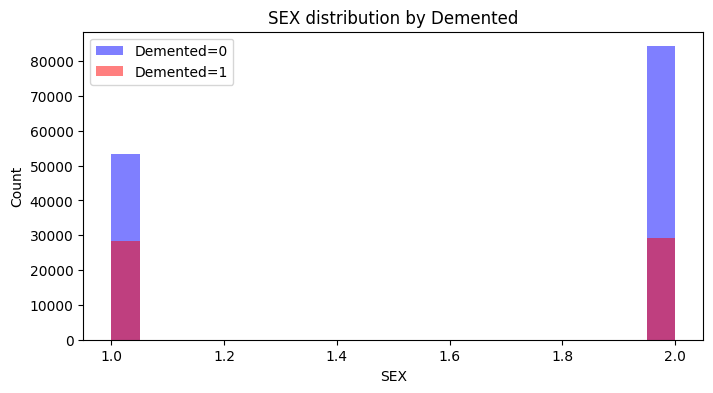

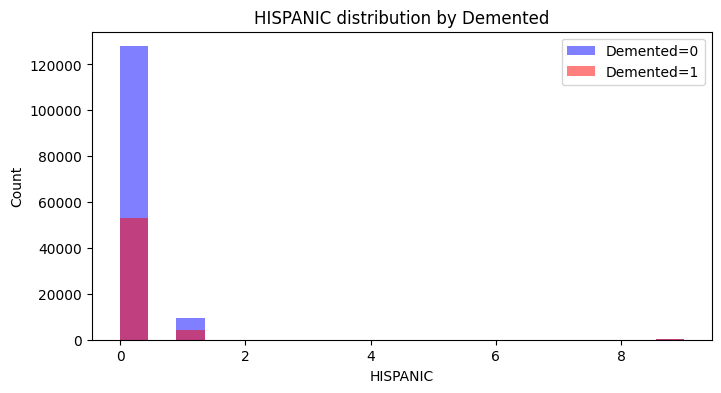

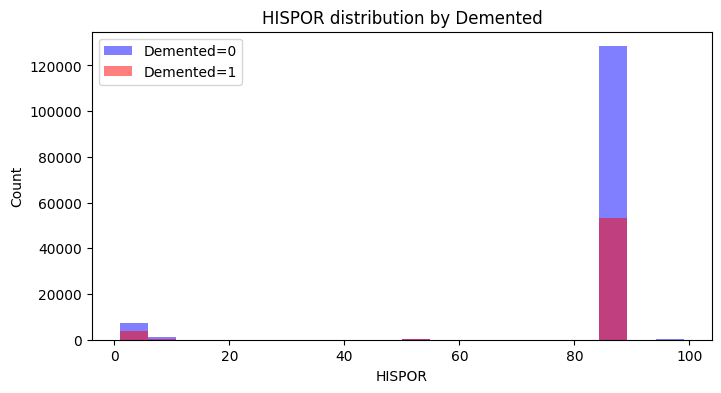

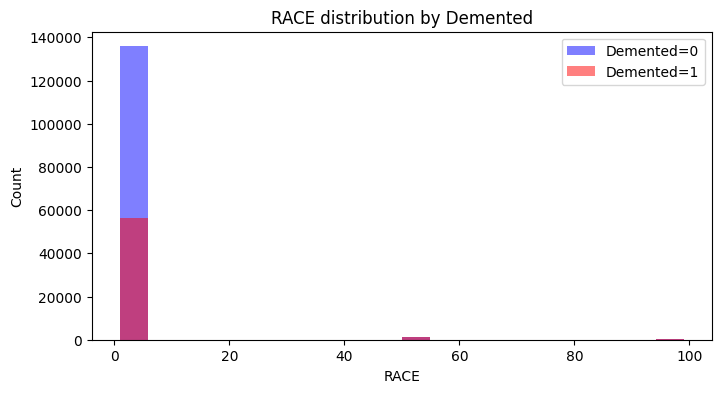

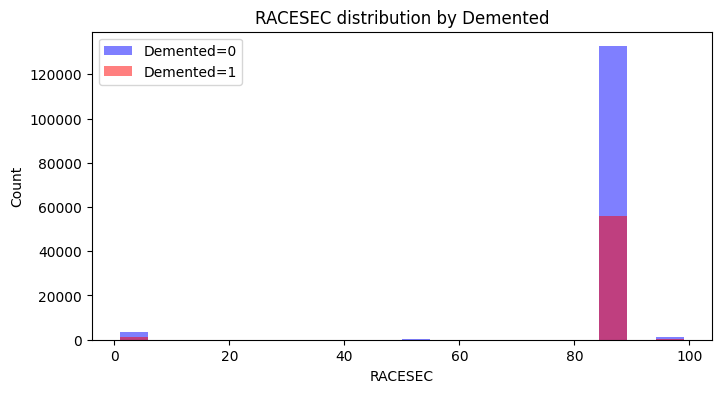

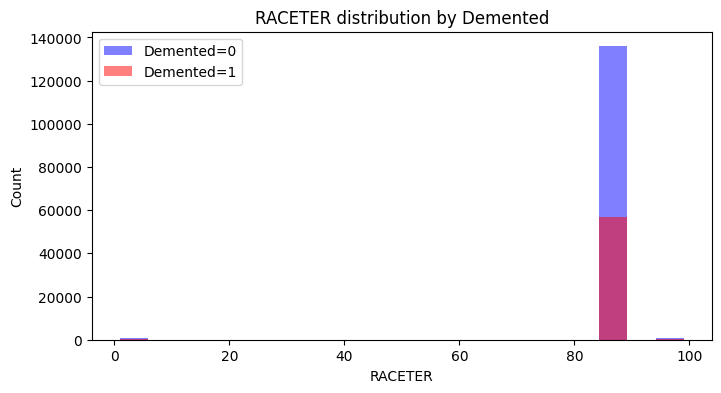

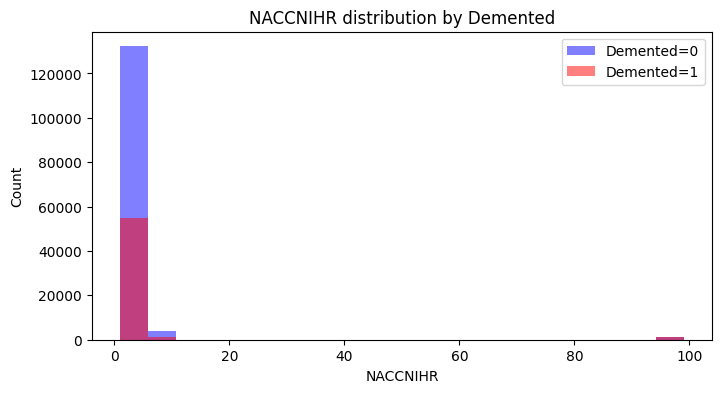

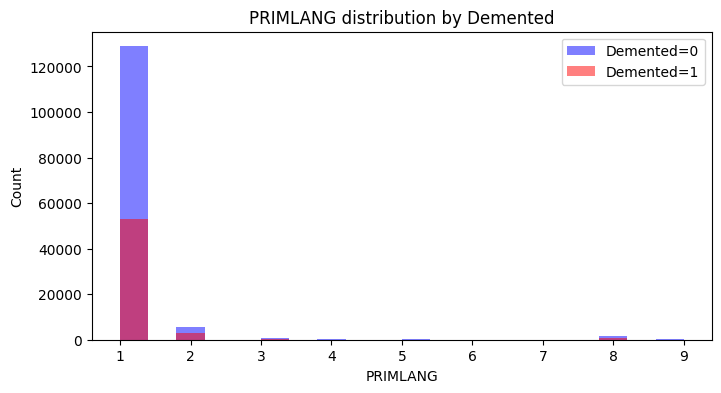

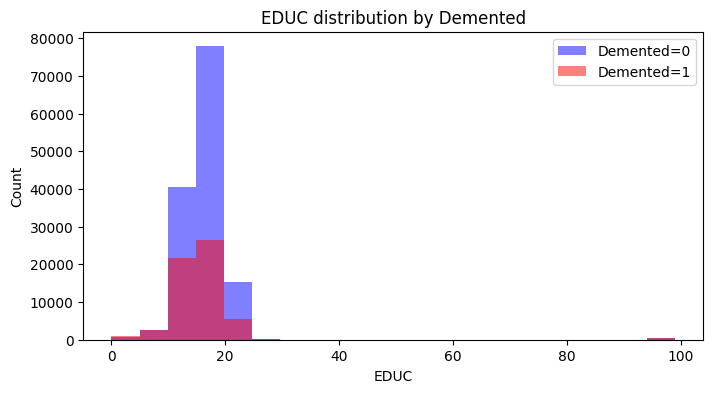

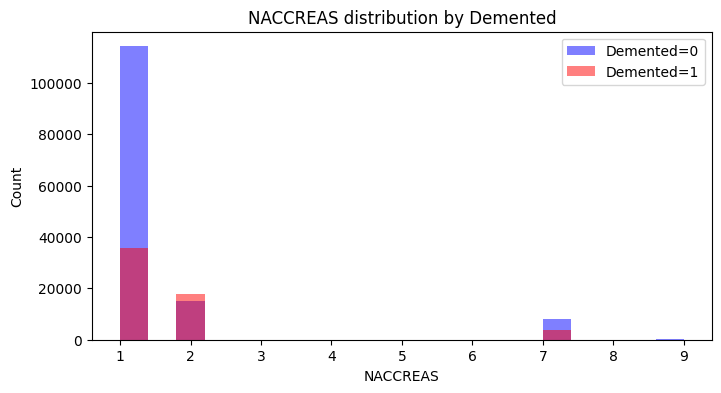

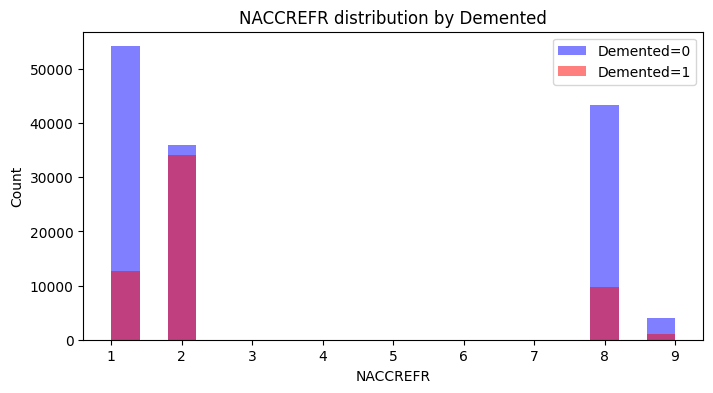

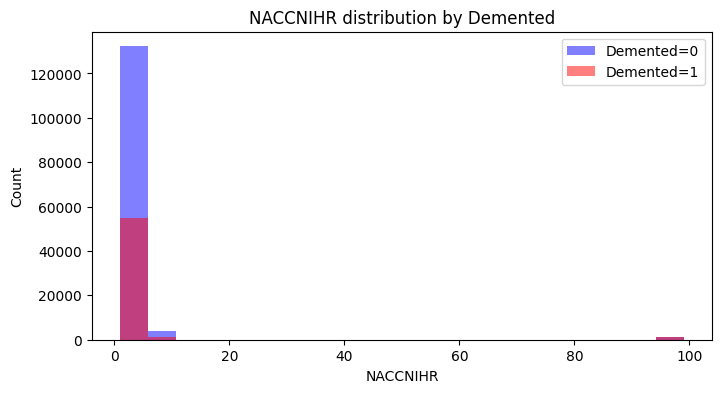

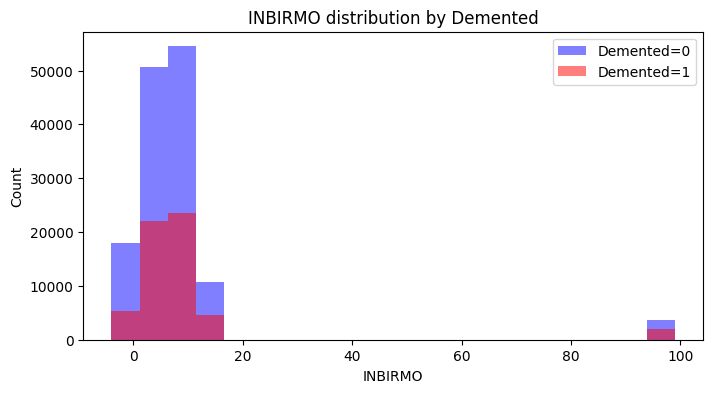

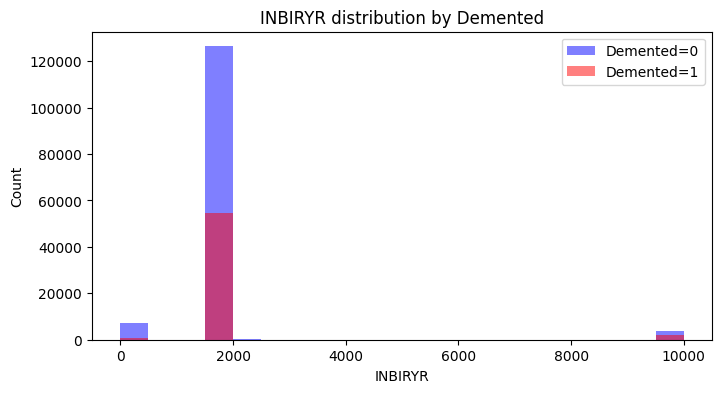

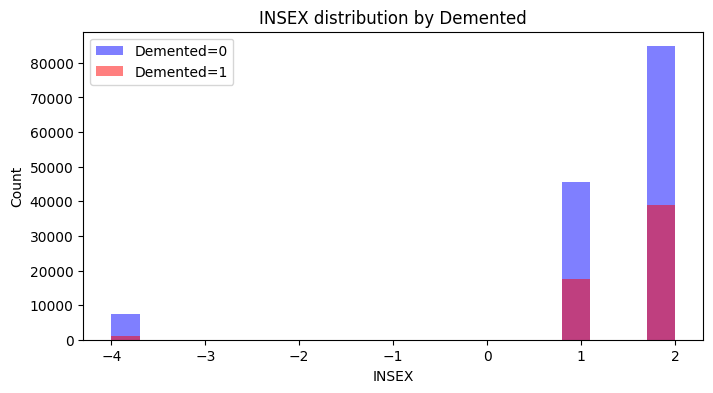

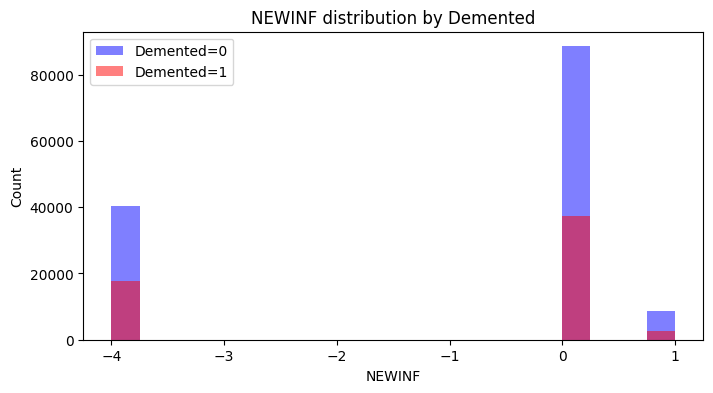

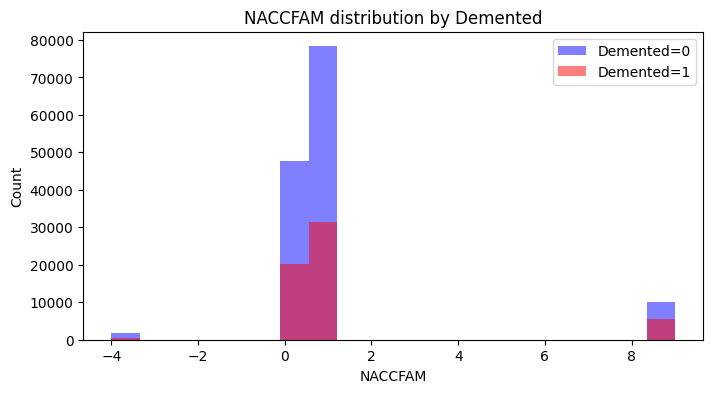

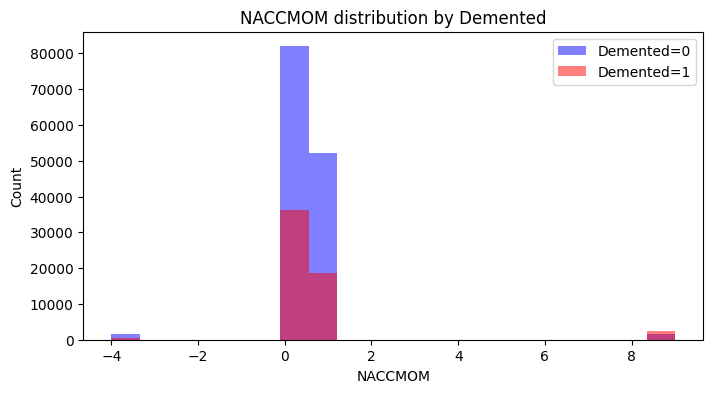

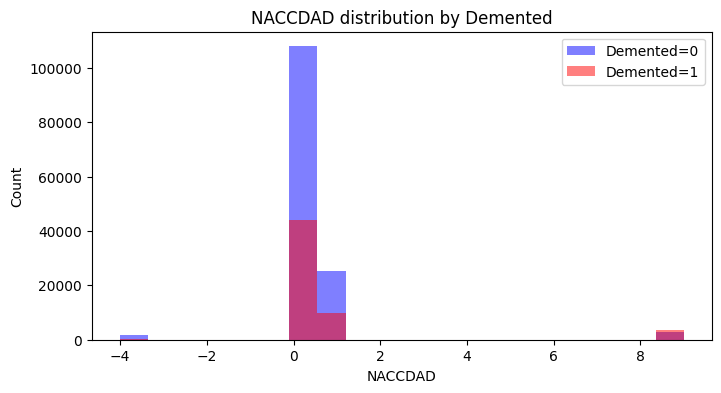

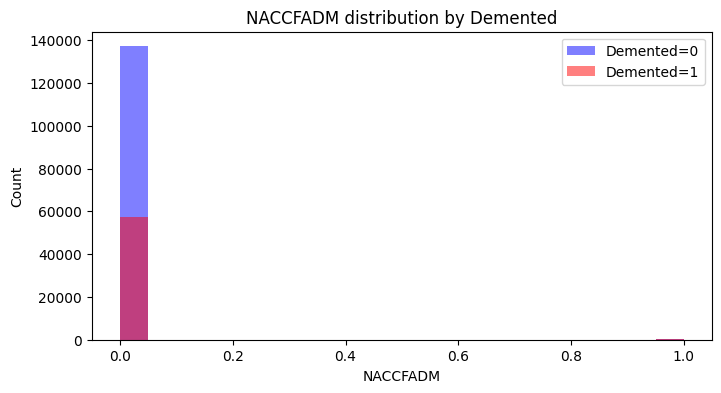

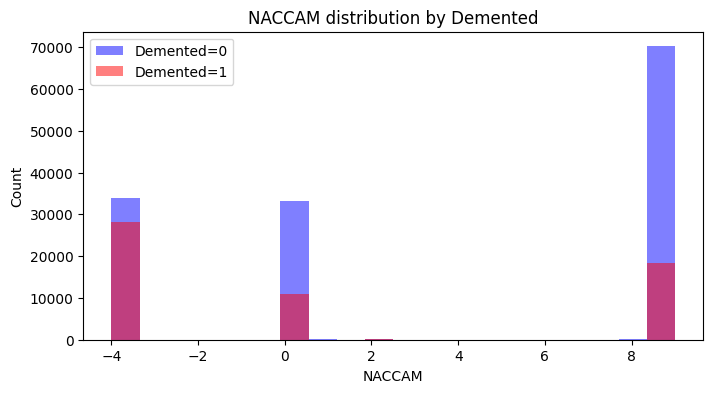

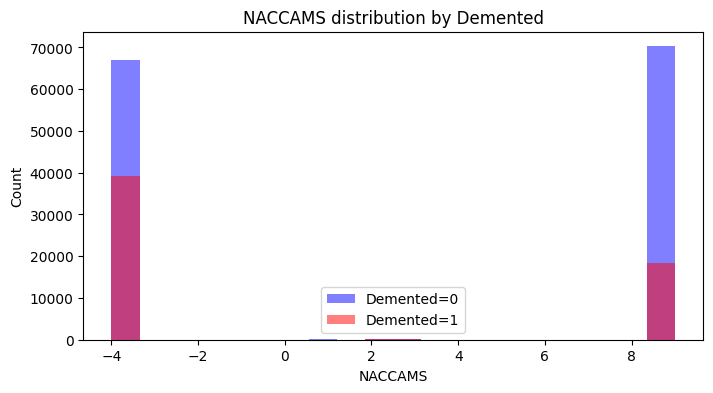

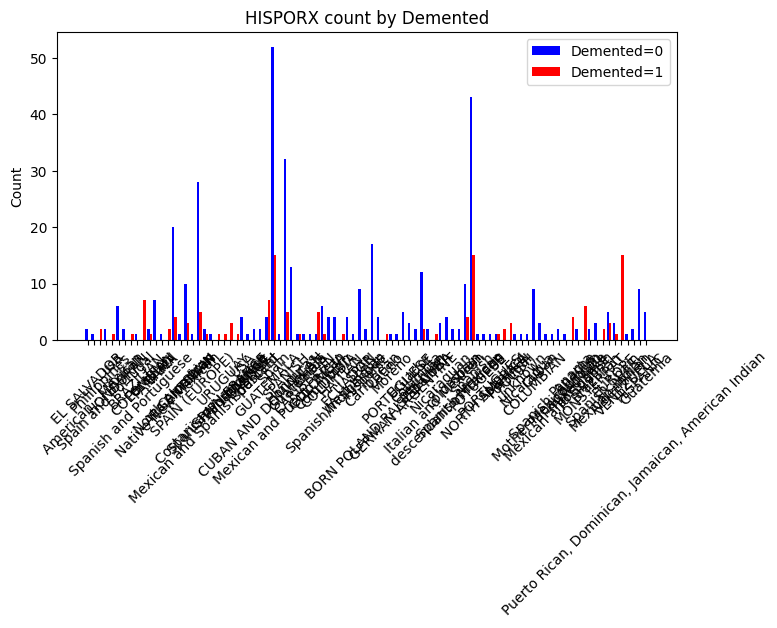

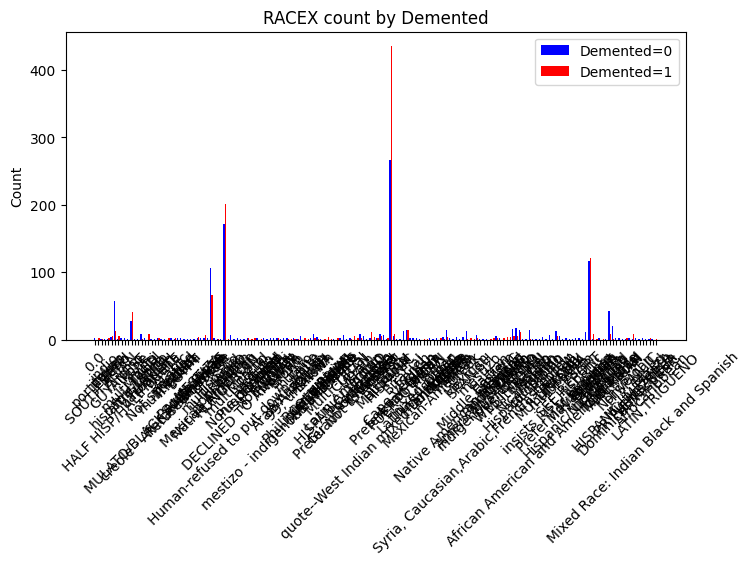

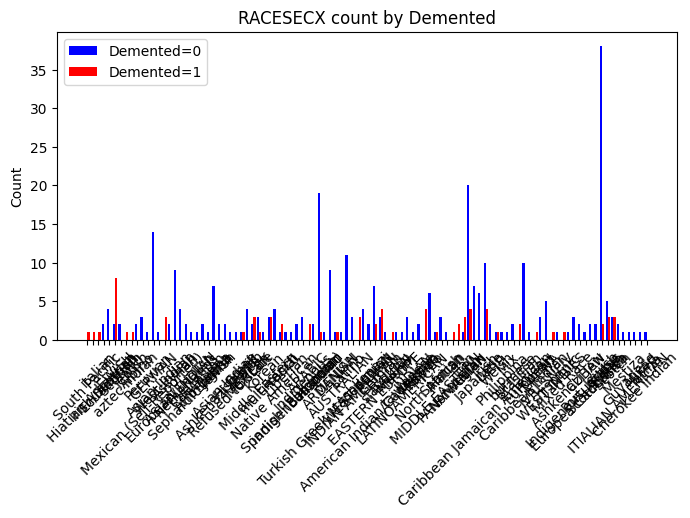

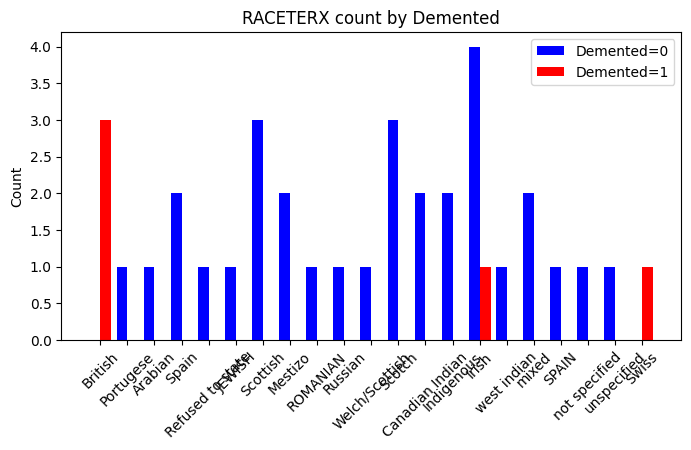

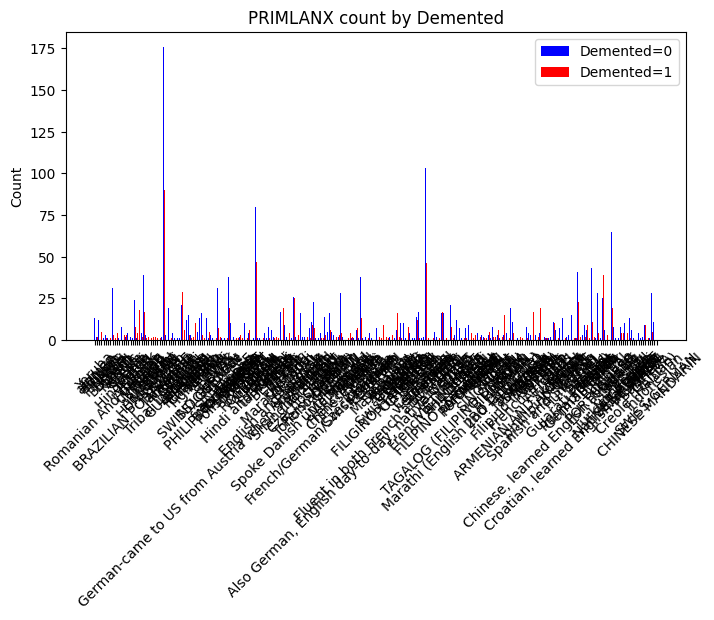

In [ ]:

# Separate numeric and categorical columns
numeric_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[df['DEMENTED']==0][col], bins=20, alpha=0.5, label='Demented=0', color='blue')
    plt.hist(df[df['DEMENTED']==1][col], bins=20, alpha=0.5, label='Demented=1', color='red')
    plt.title(f'{col} distribution by Demented')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    counts_0 = df[df['DEMENTED']==0][col].value_counts()
    counts_1 = df[df['DEMENTED']==1][col].value_counts()

    # Combine index for alignment
    categories = list(set(counts_0.index) | set(counts_1.index))
    counts_0 = counts_0.reindex(categories, fill_value=0)
    counts_1 = counts_1.reindex(categories, fill_value=0)

    # Bar width
    width = 0.4
    x = range(len(categories))

    plt.bar([i - width/2 for i in x], counts_0, width=width, color='blue', label='Demented=0')
    plt.bar([i + width/2 for i in x], counts_1, width=width, color='red', label='Demented=1')
    plt.xticks(x, categories, rotation=45)
    plt.title(f'{col} count by Demented')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [ ]:
df_new.isnull().sum()

,0
MARISTAT,0
NACCLIVS,0
INDEPEND,0
RESIDENC,0
HANDED,0
BIRTHMO,0
BIRTHYR,0
SEX,0
HISPANIC,0
HISPOR,0


## 2. Feature Engineering & Selection

In [ ]:
# after visualizaton we found most categorical variable dont effect to the model and
# there are lots of categories in those features and lots of them are null
# so,

df_new = df_new.apply(pd.to_numeric, errors='coerce')
cols_with_missing = df_new.columns[df_new.isnull().sum() != 0].tolist()
df_new=df_new.drop(cols_with_missing,axis=1)
df_new.columns

Index(['MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'BIRTHMO',
       'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER',
       'NACCNIHR', 'PRIMLANG', 'EDUC', 'NACCREAS', 'NACCREFR', 'NACCNIHR',
       'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF', 'NACCFAM', 'NACCMOM',
       'NACCDAD', 'NACCFADM', 'NACCAM', 'NACCAMS'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x = df_new
y = df['DEMENTED']

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)


In [ ]:
# normalizing dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 3. Model Development & Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8892418032786885
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27530
           1       0.84      0.77      0.80     11510

    accuracy                           0.89     39040
   macro avg       0.87      0.85      0.86     39040
weighted avg       0.89      0.89      0.89     39040



In [ ]:
confusion_matrix(y_test, y_pred)

array([[25881,  1649],
       [ 2675,  8835]])

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_proba

array([0.49722396, 0.07973924, 0.64196637, ..., 0.04749812, 0.04507161,
       0.59235643])

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.901921106557377
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27530
           1       0.83      0.84      0.83     11510

    accuracy                           0.90     39040
   macro avg       0.88      0.88      0.88     39040
weighted avg       0.90      0.90      0.90     39040



In [ ]:
confusion_matrix(y_test, y_pred)

array([[25533,  1997],
       [ 1832,  9678]])

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'n_estimators': 200,
    'num_leaves': 255,
    'max_depth': 12,
    'max_bin': 255,

    'lambda_l1': 0.1,
    'lambda_l2': 0.3,
    'min_gain_to_split': 0.0,
    'min_data_in_leaf': 30,


    'is_unbalance': False,

    'max_cat_threshold': 64,
    'cat_smooth': 10,
    'random_state': 42,

    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}
model = lgb.train(
    params,
    train_data,
    num_boost_round=300,
    valid_sets=[train_data, test_data]
)

# Predict
y_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_proba > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9095799180327869
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     27530
           1       0.85      0.84      0.85     11510

    accuracy                           0.91     39040
   macro avg       0.89      0.89      0.89     39040
weighted avg       0.91      0.91      0.91     39040



In [ ]:
confusion_matrix(y_test, y_pred)

array([[25533,  1997],
       [ 1832,  9678]])

## 4. Hyperparameter Tuning & Optimization

In [62]:
## we use following features to create a better model
non_medical_variables = [
    # Demographics
    "BIRTHMO", "BIRTHYR", "NACCAGE", "NACCAGEB", "SEX",
    "HISPANIC", "HISPOR", "HISPORX",
    "RACE", "RACEX", "RACESEC", "RACESECX", "RACETER", "RACETERX",
    "PRIMLANG", "PRIMLANX", "EDUC", "MARISTAT",
    "NACCLIVS", "INDEPEND", "RESIDENC", "HANDED",

    # Informant / study partner
    "INBIRMO", "INBIRYR", "INSEX", "NEWINF",
    "INHISP", "INHISPOR", "INHISPOX",
    "INRACE", "INRACEX", "INRASEC", "INRASECX",
    "INRATER", "INRATERX", "INEDUC",
    "INRELTO", "INRELTOX", "INKNOWN", "INLIVWTH",
    "INVISITS", "INCALLS", "INRELY",

    # Family / household
    "NACCFAM", "NACCMOM", "NACCDAD",
    "NACCAM", "NACCAMX", "NACCAMS", "NACCAMSX",
    "NACCFM", "NACCFMX", "NACCFMS", "NACCFMSX",
    "NACCOM", "NACCOMX", "NACCOMS", "NACCOMSX",
    "NACCFADM", "NACCFFTD",

    # Lifestyle / substance use
    "TOBAC30", "TOBAC100", "SMOKYRS", "PACKSPER", "QUITSMOK",
    "ALCOCCAS", "ALCFREQ", "ALCOHOL",

    # Basic physical / anthropometrics / vitals (non-clinical measurements)
    "HEIGHT", "WEIGHT", "NACCBMI", "BPSYS", "BPDIAS", "HRATE",
    "VISION", "VISCORR", "VISWCORR", "HEARING", "HEARAID", "HEARWAID",

    # Self-reported/simple medical history (things a person usually knows)
    "DIABETES", "HYPERTEN", "HYPERCHO", "MYOINF", "CVHATT",
    "CONGHRT", "AFIBRILL", "CVCHF", "CVANGINA", "CVANGIO",
    "CVBYPASS", "CVPACDEF", "CVPACE",
    "CBSTROKE", "STROKE", "PREVSTK", "CBTIA", "TBI", "NACCTBI",
    "PD", "SEIZURES",

    # Psychiatric history / self-known mental health diagnoses
    "DEP", "BIPOLDX", "ANXIET", "PTSDDX", "SCHIZOP",

    # Social / functional / activities of daily living (non-clinical context)
    "HOMEHOBB", "PERSCARE",
    "BILLS", "TAXES", "SHOPPING", "GAMES", "STOVE", "MEALPREP",
    "EVENTS", "PAYATTN", "REMDATES", "TRAVEL",

    # Mood / self-report (GDS-like items)
    "NOGDS", "SATIS", "DROPACT", "EMPTY", "BORED", "SPIRITS",
    "AFRAID", "HAPPY", "HELPLESS", "STAYHOME", "MEMPROB",
    "WONDRFUL", "WRTHLESS", "ENERGY", "HOPELESS", "BETTER",

    # Response / informant reliability / questionnaire metadata
    "RESPVAL", "RESPHEAR", "RESPDIST", "RESPINTR", "RESPDISN",
    "RESPFATG", "RESPEMOT", "RESPASST", "RESPOTH", "RESPOTHX",

    # Misc / administrative fields (useful for grouping / provenance but non-medical)
    "VISITMO", "VISITDAY", "VISITYR", "NACCVNUM", "NACCAVST",
    "PACKET", "FORMVER", "NACCREAS", "NACCREFR", "TELCOV", "TELMOD"
]
df_new=df[non_medical_variables]

In [46]:
df_new.isnull().sum()

,0
BIRTHMO,0
BIRTHYR,0
NACCAGE,0
NACCAGEB,0
SEX,0
...,...
FORMVER,0
NACCREAS,0
NACCREFR,0
TELCOV,0


In [66]:
df_new = df_new.apply(pd.to_numeric, errors='coerce')
cols_with_missing = df_new.columns[df_new.isnull().sum() != 0].tolist()
df_new=df_new.drop(cols_with_missing,axis=1)
df_new.columns

Index(['BIRTHMO', 'BIRTHYR', 'NACCAGE', 'NACCAGEB', 'SEX', 'HISPANIC',
       'HISPOR', 'RACE', 'RACESEC', 'RACETER',
       ...
       'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'FORMVER',
       'NACCREAS', 'NACCREFR', 'TELCOV', 'TELMOD'],
      dtype='object', length=129)

In [67]:
from sklearn.model_selection import train_test_split

x = df_new
y = df['DEMENTED']

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9338114754098361
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     27530
           1       0.91      0.86      0.88     11510

    accuracy                           0.93     39040
   macro avg       0.93      0.91      0.92     39040
weighted avg       0.93      0.93      0.93     39040



In [51]:
confusion_matrix(y_test, y_pred)

array([[26579,   951],
       [ 1633,  9877]])

In [52]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [53]:
y_proba

array([0.9987407 , 0.02125396, 0.99662319, ..., 0.01031117, 0.02251749,
       0.17374281])

In [78]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9388831967213115
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27530
           1       0.92      0.87      0.89     11510

    accuracy                           0.94     39040
   macro avg       0.93      0.92      0.93     39040
weighted avg       0.94      0.94      0.94     39040



In [55]:
confusion_matrix(y_test, y_pred)

array([[26550,   980],
       [ 1217, 10293]])

In [71]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'n_estimators': 200,
    'num_leaves': 255,
    'max_depth': 12,
    'max_bin': 255,

    'lambda_l1': 0.1,
    'lambda_l2': 0.3,
    'min_gain_to_split': 0.0,
    'min_data_in_leaf': 30,


    'is_unbalance': False,

    'max_cat_threshold': 64,
    'cat_smooth': 10,
    'random_state': 21,

    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}
model = lgb.train(
    params,
    train_data,
    num_boost_round=300,
    valid_sets=[train_data, test_data]
)

# Predict
y_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_proba > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9461065573770492
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27530
           1       0.92      0.90      0.91     11510

    accuracy                           0.95     39040
   macro avg       0.94      0.93      0.93     39040
weighted avg       0.95      0.95      0.95     39040



## 5. Model Evaluation & Metrics

In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9461065573770492
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27530
           1       0.92      0.90      0.91     11510

    accuracy                           0.95     39040
   macro avg       0.94      0.93      0.93     39040
weighted avg       0.95      0.95      0.95     39040



In [72]:
confusion_matrix(y_test, y_pred)

array([[26589,   941],
       [ 1163, 10347]])

## 6. Explainability & Insights

In [74]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [76]:
# estimated risk of having dementia is X%
y_proba*100

array([98.58939026,  0.31039709, 95.47484772, ...,  0.10857546,
        4.61494696, 39.93344625])